# Read the Dataset

In [161]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import time 
from sklearn.datasets import load_boston
from matplotlib import cm
import seaborn as sns
from scipy.optimize import minimize
import math
from sklearn.preprocessing import PolynomialFeatures

In [162]:
columns = ['Microchip Test 1','Microchip Test 2','Result']
dataframe = pd.read_csv("./Data/ex2data2.txt", delimiter=',', header = None, names = columns)
# otterrò una struttura dati chiamata pandas dataframe
# l'indice è fittizio e può essere usato per le queries

In [163]:
print('# of negative examples: {}'.format(dataframe[dataframe['Result'] == 0].shape[0]))
print('# of positive examples: {}'.format(dataframe[dataframe['Result'] == 1].shape[0]))

# of negative examples: 60
# of positive examples: 58


In [164]:
#dataframe = dataframe.reindex(['intercept'] + columns, axis="columns") #inserisco la colonna al posto giusto
#preferiamo fare così
dataframe.insert(0,'intercept',1)

In [165]:
x = dataframe.iloc[:, :3]
y = dataframe.iloc[:, [-1]]


In [166]:
# classe negativa
neg = x[y.Result == 0]
# classe positiva
pos = x[y.Result == 1]

# Plot training Data

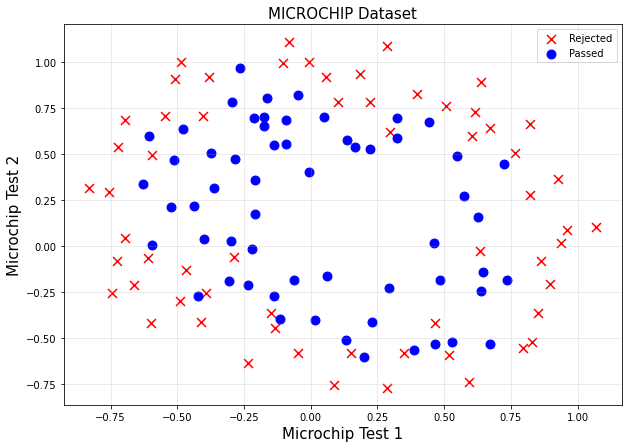

In [167]:
plt.figure(figsize = (10,7)) # dichiaro l'ambiente per disegnare
plt.scatter(neg.iloc[:,1],neg.iloc[:, 2], marker='x', c='red', label='Rejected', s=80)
plt.scatter(pos.iloc[:,1],pos.iloc[:, 2], marker='o', c='blue', label='Passed', s=80)
plt.xlabel(columns[0], fontsize=15)
plt.ylabel(columns[1], fontsize=15)
plt.grid(alpha=0.3)
plt.legend()
plt.title('MICROCHIP Dataset', fontsize=15)
plt.show()

In [168]:
#implementazione della (3)
def sigmoid(z):
    return 1/(1+ np.exp(-z))


# Logistic Regression Cost Function(Binary Cross Entropy (BCE)) Regularized

$$\large J(\theta) = \frac{1}{m}\sum_{i = 0}^{m-1} \Big[ -y^{(i)}\log(h_{\theta}(x^{(i)})) - (1-y^{(i)})\log(1-h_{\theta}(x^{(i)}))\Big]  + \frac{\lambda}{2m} \sum_{j=1}^{n}\theta_j^2$$

In [169]:
#Vettorizzata

$$\large J(\theta) = -\frac{1}{m}(\log(g(X\theta))^T Y +  \log(1-g(X\theta))^T(1-Y)) + \frac{\lambda}{2m}\theta_r^T\theta_r$$


In [170]:
def costFunctionVectorizedRegularized(theta,X, y,reg = 0):
    m = X.shape[0]
    
    h = sigmoid(X.dot(theta))
    
    J = -1*(1/m)*(np.log(h).T.dot(y) + np.log(1-h).T.dot(1-y)) + (reg/(2*m))*(theta[1:].T.dot(theta[1:]))
    
    if np.isnan(J[0]):
        return (np.inf)
    
    return (J[0])

In [171]:
theta = np.zeros((x_train.shape[1],1))

In [172]:
costFunctionVectorizedRegularized(theta, x_train.values, y_train.values)

array([0.69314718])

# Advanced Optimization

In [173]:
def gradientReg(theta, x, y, reg = 0):
    
    m = x.shape[0]
    h = sigmoid(x.dot(theta.reshape(-1,1)))
    grad = (1/m)*x.T.dot(h-y) + (reg/m)*np.r_[[[0]], theta[1:].reshape(-1,1)]
    
    return (grad.flatten())

# Plot the decision boundaries by varying the regularization parameter

In [211]:
def classify(theta, x, threshold = 0.5):
    positive = sigmoid(x.dot(theta)) >= threshold
    return positive.astype('int')

In [212]:
poly = PolynomialFeatures(6)
XX = poly.fit_transform(x.iloc[:,1:3])

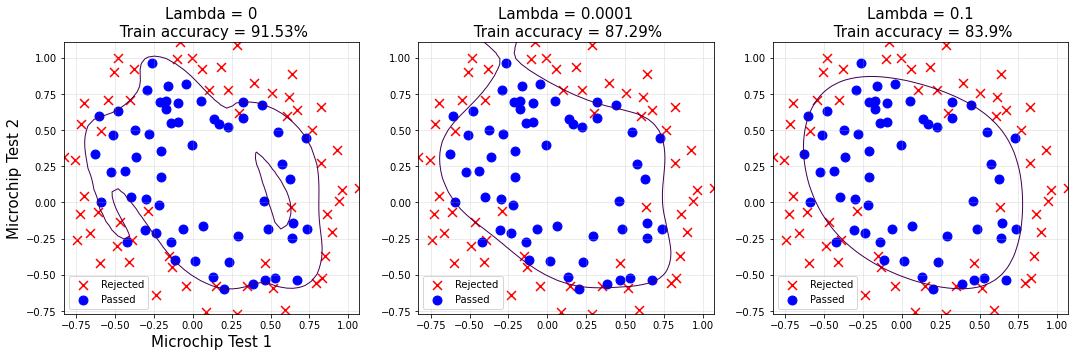

In [218]:
fig = plt.figure(figsize=(18,5))

for i, c in enumerate ([0, 0.0001, 0.1]):
    res = minimize(costFunctionVectorizedRegularized, np.zeros((XX.shape[1],1)), args=(XX, y.values, c), method="BFGS", jac=gradientReg)
    theta_optimizer = res.x.reshape(-1,1)
    accuracy = (sum(classify(res.x, XX) == y.values.ravel())/y.shape[0])*100
    ax = fig.add_subplot(1,3,i+1)
    ax.scatter(neg.iloc[:,1],neg.iloc[:, 2], marker='x', c='red', label='Rejected', s=80)
    ax.scatter(pos.iloc[:,1],pos.iloc[:, 2], marker='o', c='blue', label='Passed', s=80)

    ######## calcolo dell'ipotesi ########
    x1_min = x.iloc[:,1].min();
    x1_max = x.iloc[:,1].max();

    x2_min = x.iloc[:,2].min();
    x2_max = x.iloc[:,2].max();

    xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))

    h = poly.fit_transform(np.c_[xx1.ravel(), xx2.ravel()]).dot(theta_optimizer)
    ####### fine calcolo ipotesi ########

    # countour plot #

    ax.contour(xx1, xx2, h.reshape(xx1.shape), [0], linewidths=1)
    
    if(c == 0):
        ax.set_xlabel(columns[0], fontsize=15)
        ax.set_ylabel(columns[1], fontsize=15)
    ax.legend()
    ax.grid(alpha=0.3)
    ax.set_title('Lambda = {}\n Train accuracy = {}%'.format(c, np.round(accuracy,2)), fontsize=15)
